In [95]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib as plt

In [96]:
bike = pd.read_csv("./bike_train.csv", index_col=0, parse_dates=True)
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [97]:
bike.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [111]:
bike['dow_label'] = bike.index.day_name()
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week,dow_label
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,6,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,6,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,6,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,6,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,6,Saturday


In [ ]:
# bike["new_week"] = bike["dow_label"].map

In [99]:
bike['day_of_week'] = bike.index.weekday + 1
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,6
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,6
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,6
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,6
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,6


In [112]:
# I want to see the data over the year but downsampling it day. So, one data point for each day
bike.columns
ds_bike = bike[['casual', 'registered', 'count']].resample('D').sum()
ds_bike.head()


,casual,registered,count
datetime,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600


In [117]:
bike.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'day_of_week',
       'dow_label'],
      dtype='object')

<Axes: xlabel='datetime'>

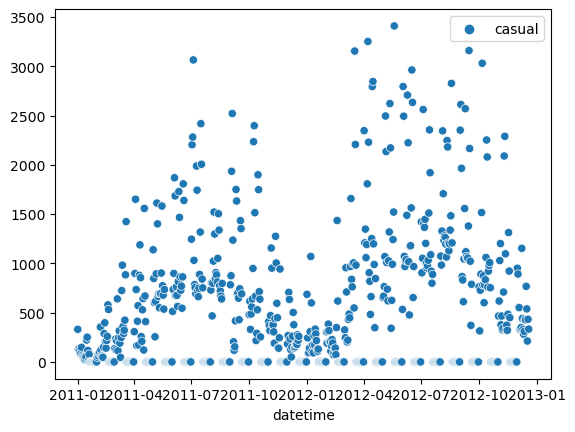

In [128]:
# Here is the plot. These gaps are the dates which is the part of test data actually. 
# But they are not missing in the dataset.
sns.scatterplot(ds_bike[['registered']], color ='blue')
sns.scatterplot(ds_bike[['casual']], color ='orange')



In [6]:
# Here I wonder on which dates the bikes used the less. 
ten_days=bike["2011-01-01":"2011-01-10"]
ten_days

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2011-01-10 19:00:00,1,0,1,1,6.56,8.335,47,11.0014,3,92,95
2011-01-10 20:00:00,1,0,1,1,6.56,8.335,50,11.0014,1,73,74
2011-01-10 21:00:00,1,0,1,1,5.74,6.820,59,12.9980,1,37,38


/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_27613/1689210508.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  weekend_affect.set_xticklabels(weekend_affect.get_xticklabels(), rotation=40, ha="right")


[Text(14975.0, 0, '2011-01-01'),
 Text(14976.0, 0, '2011-01-02'),
 Text(14977.0, 0, '2011-01-03'),
 Text(14978.0, 0, '2011-01-04'),
 Text(14979.0, 0, '2011-01-05'),
 Text(14980.0, 0, '2011-01-06'),
 Text(14981.0, 0, '2011-01-07'),
 Text(14982.0, 0, '2011-01-08'),
 Text(14983.0, 0, '2011-01-09'),
 Text(14984.0, 0, '2011-01-10'),
 Text(14985.0, 0, '2011-01-11')]

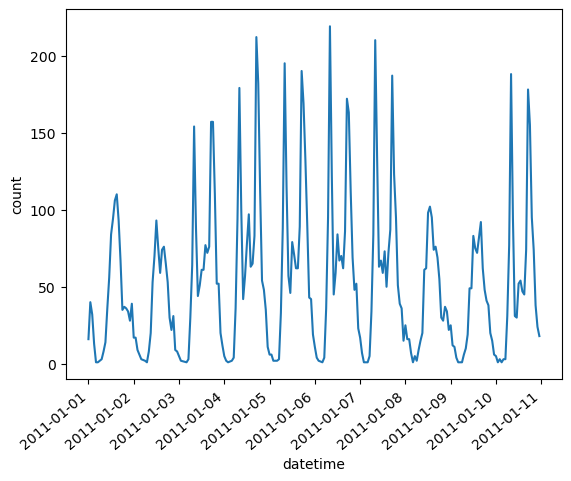

In [7]:
# So ppl uses bikes during the weekdays more. The drops are happing on the weekends.
# I checked in the calendar. 
weekend_affect=sns.lineplot(data=ten_days['count'])
weekend_affect.set_xticklabels(weekend_affect.get_xticklabels(), rotation=40, ha="right")


In [9]:
oneday = bike["2011-01-06":"2011-01-07"]
oneday

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-06 00:00:00,1,0,1,1,7.38,12.120,55,0.0000,0,11,11
2011-01-06 01:00:00,1,0,1,1,6.56,11.365,64,0.0000,0,4,4
2011-01-06 02:00:00,1,0,1,1,6.56,11.365,64,0.0000,0,2,2
2011-01-06 04:00:00,1,0,1,2,6.56,9.850,64,6.0032,0,1,1
2011-01-06 05:00:00,1,0,1,2,5.74,9.090,69,6.0032,0,4,4
2011-01-06 06:00:00,1,0,1,2,5.74,8.335,63,7.0015,0,36,36
2011-01-06 07:00:00,1,0,1,2,6.56,11.365,59,0.0000,0,95,95
2011-01-06 08:00:00,1,0,1,1,6.56,11.365,59,0.0000,3,216,219
2011-01-06 09:00:00,1,0,1,2,7.38,12.120,51,0.0000,6,116,122


/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_27613/3143554812.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  daily.set_xticklabels(daily.get_xticklabels(), rotation=40, ha="right")


[Text(14980.0, 0, '01-06 00'),
 Text(14980.25, 0, '01-06 06'),
 Text(14980.5, 0, '01-06 12'),
 Text(14980.75, 0, '01-06 18'),
 Text(14981.0, 0, '01-07 00'),
 Text(14981.25, 0, '01-07 06'),
 Text(14981.5, 0, '01-07 12'),
 Text(14981.75, 0, '01-07 18'),
 Text(14982.0, 0, '01-08 00')]

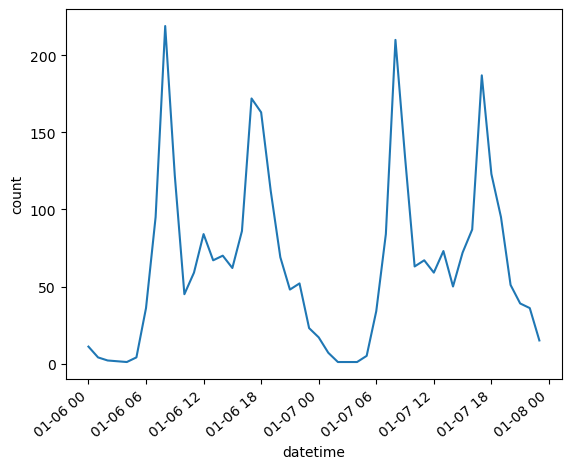

In [13]:
daily = sns.lineplot(oneday["count"])
daily.set_xticklabels(daily.get_xticklabels(), rotation=40, ha="right")

In [ ]:
# It would be better to add a column with weekends.

<Axes: xlabel='season', ylabel='count'>

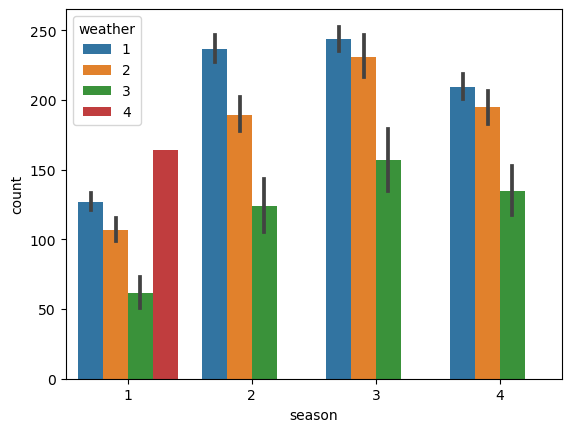

In [15]:
# What is happening here. No thunderstorm, snow in winter or fall but only in spring. 
# Weather is a not good predictor most probably.
sns.barplot(data = bike, x = "season", y = "count", hue = "weather")

In [68]:
# Just to check data if really weather 4 does not exist in other seasons.
bike.groupby(["season", "weather"]).mean()


holiday  workingday       temp      atemp   humidity  \
season weather                                                          
1      1        0.023877    0.689596  12.539147  15.135455  50.115406   
       2        0.032168    0.662937  12.626853  15.548713  65.511888   
       3        0.028436    0.663507  12.152322  14.943199  76.473934   
       4        0.000000    1.000000   8.200000  11.365000  86.000000   
2      1        0.022765    0.690727  23.180822  27.033373  54.928928   
       2        0.009887    0.661017  22.490932  26.345071  69.501412   
       3        0.000000    0.808036  21.001518  24.496004  81.147321   
3      1        0.026943    0.676684  29.227264  33.044816  60.589119   
       2        0.066225    0.668874  28.048344  31.772434  69.498344   
       3        0.020101    0.678392  26.788040  29.984497  82.090452   
4      1        0.040541    0.632197  16.235711  19.670323  61.039953   
       2        0.027261    0.732342  16.970037  20.355675  71.630731   
       3        0.022222    0.795556  18.626756  21.946089  85.435556   

                windspeed     casual  registered       count  
season weather                                                
1      1        15.735428  17.649801  109.131893  126.781694  
       2        12.615753  13.718881   93.142657  106.861538  
       3        12.369851   3.526066   57.701422   61.227488  
       4         6.003200   6.000000  158.000000  164.000000  
2      1        13.281733  53.128262  183.601333  236.729595  
       2        12.969080  41.491525  148.024011  189.515537  
       3        15.781312  20.589286  103.316964  123.906250  
3      1        11.241711  54.972539  188.610881  243.583420  
       2        11.409224  49.783113  180.988411  230.771523  
       3        14.402239  32.924623  123.658291  156.582915  
4      1        11.414596  33.532902  175.978261  209.511163  
       2        11.678200  22.294919  172.489467  194.784387  
       3        13.671573  13.666667  120.800000  134.466667

<Axes: xlabel='season', ylabel='count'>

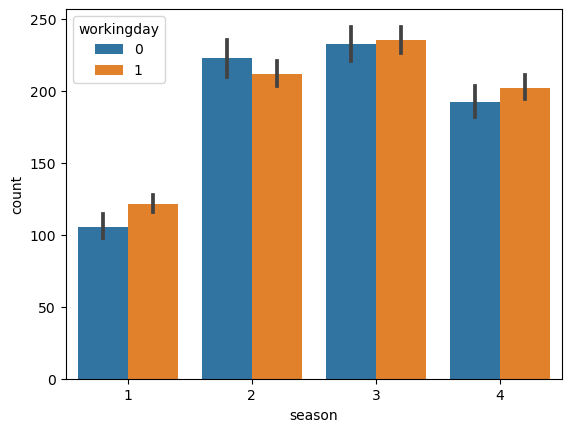

In [18]:
# That is weird. Because the line plot showed in workings days biked are used more. 
# But maybe only some hours in weekdays. I definatly need a column whics tells the days.
sns.barplot(data = bike, x = "season", y = "count", hue = "workingday")


In [52]:
month_ds=ds_bike["2011-02-01":"2011-03-01"]
month_ds

,casual,registered,count
datetime,,,
2011-02-01,47,1313,1360
2011-02-02,72,1454,1526
2011-02-03,61,1489,1550
2011-02-04,88,1620,1708
2011-02-05,100,905,1005
2011-02-06,354,1269,1623
2011-02-07,120,1592,1712
2011-02-08,64,1466,1530
2011-02-09,53,1552,1605


/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_27613/4167447826.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_cas_reg.set_xticklabels(plot_cas_reg.get_xticklabels(), rotation=40, ha="right")


[Text(15006.0, 0, '2011-02-01'),
 Text(15010.0, 0, '2011-02-05'),
 Text(15014.0, 0, '2011-02-09'),
 Text(15018.0, 0, '2011-02-13'),
 Text(15022.0, 0, '2011-02-17'),
 Text(15026.0, 0, '2011-02-21'),
 Text(15030.0, 0, '2011-02-25'),
 Text(15034.0, 0, '2011-03-01')]

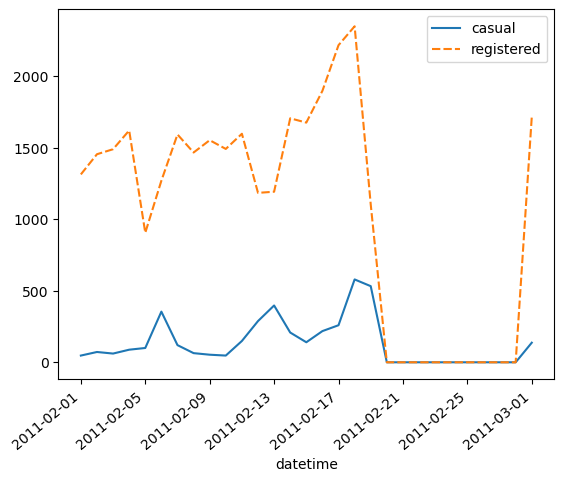

In [53]:
# So registered users uses the bike more during the weekdays. Casuals mostly on Sundays
plot_cas_reg = sns.lineplot(data = month_ds[["casual", "registered"]])
plot_cas_reg.set_xticklabels(plot_cas_reg.get_xticklabels(), rotation=40, ha="right")

In [21]:
# Some of the non working days are happened to be holiday, I suppose others are weekends.
bike.groupby(["workingday","holiday"]).sum()

season  weather       temp       atemp  humidity  \
workingday holiday                                                     
0          0          7915     4386   62801.34   73840.745    196742   
           1           839      433    6295.96    7276.590     19314   
1          0         18533    10622  151135.84  176391.910    457640   

                     windspeed  casual  registered    count  
workingday holiday                                           
0          0        39805.9596  190866      406198   597064  
           1         4105.1101   15171       42637    57808  
1          0        95423.1487  186098     1244506  1430604

In [41]:
#Add the days as a column.
#denden = pd.DataFrame({'my_dates':['2011-01-01':'2012-11-31'],'myvals':[1,2,3]})
#df['my_dates'] = pd.to_datetime(df['my_dates'])


SyntaxError: invalid syntax (1439123357.py, line 1)

In [ ]:
# So far some days, definately months, temp has an affect. Maybe group the hours.

<Axes: xlabel='temp', ylabel='casual'>

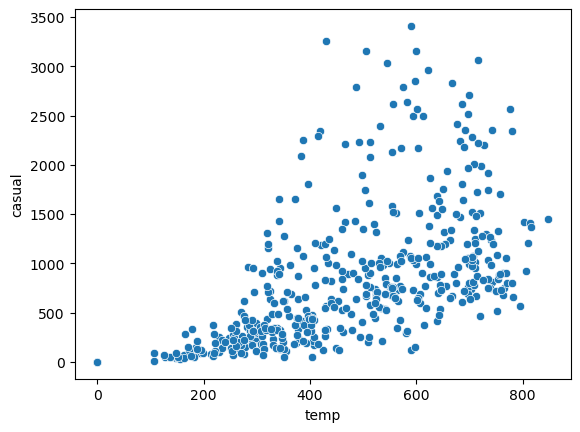

In [66]:
# Relation with the weather and the bike usage. Change the parameters.
ds_temp = bike[["temp", 'casual', 'registered', 'count']].resample('D').sum()
sns.scatterplot(data = ds_temp, x = "temp", y = "casual")


In [148]:
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week,dow_label,weekends
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,6,Saturday,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,6,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,6,Saturday,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,6,Saturday,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,6,Saturday,1


/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_27613/1142348743.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yoda = bike.groupby(["day_of_week"])["casual", "registered"].mean()


<Axes: xlabel='day_of_week'>

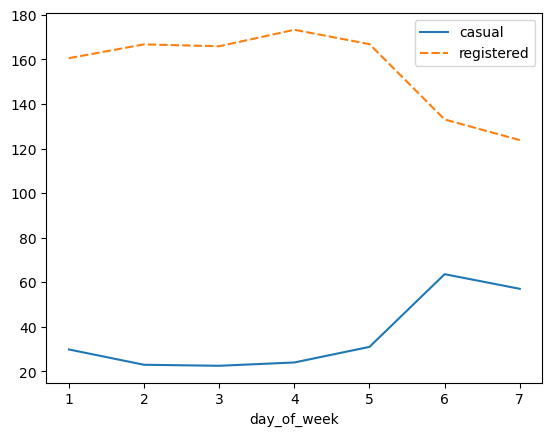

In [153]:
yoda = bike.groupby(["day_of_week"])["casual", "registered"].mean()
sns.lineplot(data = yoda)

In [142]:
# Working days is completely the same with weeknds. No need to create one.
def weekend_trans(weekday):
    if weekday in ["Saturday", "Sunday"]:
        return 1
    else:
        return 0
    
bike['weekends'] = bike["dow_label"].apply(weekend_trans)
bike    